In [20]:
from src.models import load_model_from_checkpoint, ClassificationNet


model = load_model_from_checkpoint('../models/vgg_128x128.ckpt', ClassificationNet)

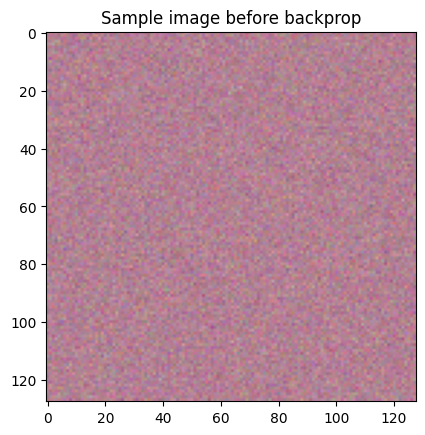

In [21]:
import matplotlib.pyplot as plt
import torch

from torch.optim import SGD

sample_images = 0.05 * torch.randn(1, 3, 128, 128)#.clip(0, 1)
sample_images = sample_images + torch.tensor([179 / 255, 128 / 255, 147 / 255]).reshape(1, 3, 1, 1)
sample_images = sample_images.clip(0, 1)
sample_images.requires_grad = True
start = sample_images.clone().detach()
plt.imshow(sample_images.detach()[0].permute(1, 2, 0))
plt.title('Sample image before backprop')
plt.show()

In [23]:
sample_images = 0.05 * torch.randn(4, 3, 128, 128)#.clip(0, 1)
sample_images = sample_images + torch.tensor([179.0 / 255, 128.0 / 255, 147.0 / 255]).reshape(1, 3, 1, 1)
sample_images = sample_images.to('cpu')
sample_images = sample_images.clip(0, 1)
sample_images.requires_grad = True

In [24]:
from IPython.display import clear_output

from torch.autograd import grad
from torch.optim.lr_scheduler import StepLR

from tqdm.auto import tqdm


optim = SGD([sample_images], lr=0.1)
scheduler = StepLR(optim, 10_000, gamma=0.1)

bar = tqdm(range(10_000))
for i in bar:
    optim.zero_grad()
    model.zero_grad()
    y = model(sample_images)
    # y = F.binary_cross_entropy_with_logits(y[:, 1].reshape(-1), target)
    y_grad = grad(
        y.sum(),
        sample_images,
        create_graph=True
    )[0]
    
    loss = (y_grad ** 2).sum()
    loss.backward()
    optim.step()
    model.zero_grad()
    bar.set_description(str(loss.cpu().item()))
    scheduler.step()
    # losses.append(float(loss.cpu().item()))
    with torch.no_grad():
        sample_images.clip_(0, 1)
    # if i % val_every == 0:
        # save_data(sample_images, save_path / f'epoch-{i}')
    
    print(f'#{i} loss: {float(loss.cpu().item())}')

124.43096160888672:   0%|          | 1/10000 [00:01<4:15:12,  1.53s/it]

#0 loss: 124.43096160888672


1.8502657413482666:   0%|          | 2/10000 [00:02<3:53:01,  1.40s/it]

#1 loss: 1.8502657413482666


1.6999177932739258:   0%|          | 3/10000 [00:04<3:57:03,  1.42s/it]

#2 loss: 1.6999177932739258


1.4662047624588013:   0%|          | 4/10000 [00:05<4:09:22,  1.50s/it]

#3 loss: 1.4662047624588013


1.4662047624588013:   0%|          | 4/10000 [00:07<5:10:46,  1.87s/it]


KeyboardInterrupt: 

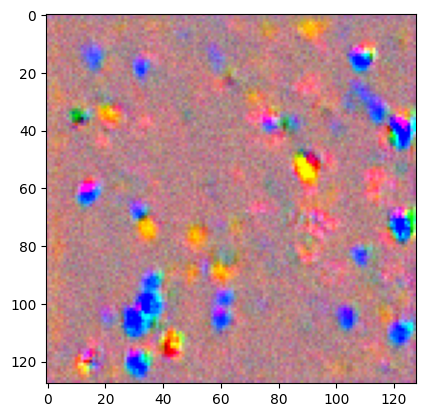

0.13780590891838074:   0%|          | 76/50000 [00:23<4:21:13,  3.19it/s]


KeyboardInterrupt: 

In [18]:
from IPython.display import clear_output

from torch.autograd import grad
from torch.optim.lr_scheduler import StepLR

from tqdm.auto import tqdm

losses = []
target = torch.ones((sample_images.shape[0],), dtype=torch.float32)

optim = SGD([sample_images], lr=0.1)
scheduler = StepLR(optim, 10_000, gamma=0.1)

bar = tqdm(range(50_000))
for i in bar:
    optim.zero_grad()
    model.zero_grad()
    preds = model(sample_images)
    preds_grad = grad(preds.sum(), sample_images, create_graph=True)[0]
    loss = (preds_grad ** 2).sum()
    loss.backward()
    optim.step()
    # model.zero_grad()
    bar.set_description(str(loss.item()))
    scheduler.step(i)
    losses.append(float(loss.item()))
    with torch.no_grad():
        sample_images.clip_(0, 1)

    if i % 5 == 0:
        clear_output(True)
        plt.imshow(sample_images.detach()[0].permute(1, 2, 0))
        plt.show()

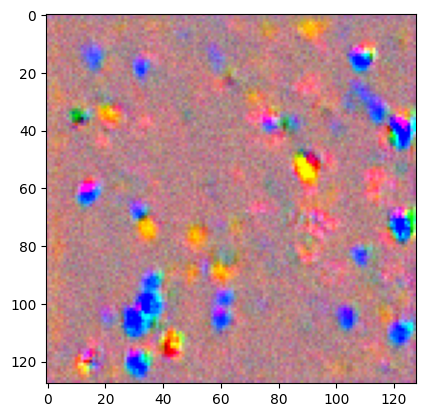

In [19]:
plt.imshow(sample_images.detach()[0].permute(1, 2, 0))
plt.show()